In [2]:
import numpy as np
import pandas as pd

In [3]:
import json


In [4]:
#f = open("sarcasm35Rows.json",'r')
#data = json.load(f)
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)
datastore = list(parse_data('./Sarcasm_Headlines_Dataset.json'))    
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
sentences

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [5]:
(labels)  #is_sarcastic: 1 if the record is sarcastic otherwise 0

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


In [6]:
len(sentences), len(labels)

(26709, 26709)

Now cleaning the sentences: </br>
Removing numbers, punctuations, whitespaces, etc.

In [7]:
import nltk
from nltk.corpus import stopwords

In [8]:
import re
stop=set(stopwords.words("english"))
def remove_num(texts):
    feed = []
    for i in texts:
        output = re.sub(r'\d+', '', i) #\d - Matches any decimal digit. Equivalent to [0-9] and removes from string
        cleaned_string = re.sub(r"[^\w\s]", '', output) # removes all those letters which are not alphabets and numbers(alphaneumeric).
                                                        #\s removes any whitespace between characters inside the words
        cleaned_string = re.sub(' +', ' ', cleaned_string) #removes white space between the words in a sentence.
        cleaned_string = ' '.join( [w.lower() for w in cleaned_string.split() if len(w)>1]) #removing single characters
        text=[word.lower() for word in cleaned_string.split() if word.lower() not in stop] # Removing stop words
        feed.append(" ".join(text))

    return feed
    
sentences = remove_num(sentences)

In [9]:
sentences

['former versace store clerk sues secret black code minority shoppers',
 'roseanne revival catches thorny political mood better worse',
 'mom starting fear sons web series closest thing grandchild',
 'boehner wants wife listen come alternative debtreduction ideas',
 'jk rowling wishes snape happy birthday magical way',
 'advancing worlds women',
 'fascinating case eating labgrown meat',
 'ceo send kids school work company',
 'top snake handler leaves sinking huckabee campaign',
 'fridays morning email inside trumps presser ages',
 'airline passengers tackle man rushes cockpit bomb threat',
 'facebook reportedly working healthcare features apps',
 'north korea praises trump urges us voters reject dull hillary',
 'actually cnns jeffrey lord indefensible',
 'barcelona holds huge protest support refugees',
 'nuclear bomb detonates rehearsal spiderman musical',
 'cosby lawyer asks accusers didnt come forward smeared legal team years ago',
 'stock analysts confused frightened boar market',
 

Now our sentences are clean!! </br> 
Now we need to convert alphates into numeric forms which computer can understand for processing.

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer


In [14]:
tokenizer = Tokenizer(oov_token = '<OOV>') 
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [15]:
word_index

{'<OOV>': 1,
 'new': 2,
 'trump': 3,
 'man': 4,
 'us': 5,
 'report': 6,
 'one': 7,
 'area': 8,
 'donald': 9,
 'says': 10,
 'day': 11,
 'woman': 12,
 'time': 13,
 'first': 14,
 'like': 15,
 'get': 16,
 'trumps': 17,
 'people': 18,
 'obama': 19,
 'house': 20,
 'life': 21,
 'make': 22,
 'still': 23,
 'women': 24,
 'white': 25,
 'back': 26,
 'clinton': 27,
 'world': 28,
 'years': 29,
 'could': 30,
 'family': 31,
 'americans': 32,
 'way': 33,
 'black': 34,
 'gop': 35,
 'study': 36,
 'year': 37,
 'bill': 38,
 'yearold': 39,
 'would': 40,
 'best': 41,
 'police': 42,
 'watch': 43,
 'really': 44,
 'american': 45,
 'show': 46,
 'school': 47,
 'cant': 48,
 'know': 49,
 'things': 50,
 'good': 51,
 'home': 52,
 'death': 53,
 'president': 54,
 'finds': 55,
 'say': 56,
 'video': 57,
 'nation': 58,
 'going': 59,
 'love': 60,
 'health': 61,
 'last': 62,
 'state': 63,
 'hillary': 64,
 'big': 65,
 'parents': 66,
 'may': 67,
 'every': 68,
 'mom': 69,
 'kids': 70,
 'campaign': 71,
 'need': 72,
 'gets': 73,

In [16]:
 len(word_index) # number of unique words or vocabulary in our corpus

27474

tokenizer = Tokenizer(oov_token = '<OOV>') </br> tokenizer object is created from Tokenizer class

</br>
tokenizer.fit_on_texts(sentences) </br> The object is fitted with our target text. </br>

This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

</br>
word_index = tokenizer.word_index</br> 

tokens returns a word_index, which maps words to some number. So word_index only generates the dictionary containing words as key value and their numeric representation as the label. </br>
These numeric values assigned to each words are result of tf-idf calculation. 
</br>
The more frequent word will have less integer value. 

</br>
Until now, we have created a dictionary which contains the numeric representation of all the words present in our corpus. Now we have to create the sentences whose words are replaced by their numeric value from word_index. For this we will use  keras and tensorflow. 


In [17]:
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[199, 14256, 677, 3379, 2098, 262, 34, 1996, 2359, 8003],
 [8004, 3118, 2529, 8005, 290, 2716, 155, 829],
 [69, 697, 678, 971, 1904, 462, 4438, 116, 10203],
 [1332, 125, 318, 1514, 211, 3119, 14257, 740],
 [4439, 4440, 767, 10204, 463, 443, 1118, 33],
 [10205, 252, 24],
 [6601, 241, 416, 14258, 1383],
 [355, 1037, 70, 47, 77, 242],
 [150, 3651, 6602, 428, 4949, 1822, 71],
 [1905, 220, 212, 291, 17, 14259, 3652],
 [2717, 1442, 4950, 4, 4013, 6603, 1906, 972],
 [184, 646, 356, 1384, 1729, 3380],
 [138, 387, 2718, 3, 794, 5, 247, 4014, 8006, 64],
 [131, 3653, 8007, 2530, 10206],
 [14260, 1234, 505, 515, 216, 741],
 [464, 1906, 10207, 10208, 5645, 1658],
 [2360, 1187, 270, 3381, 234, 211, 945, 14261, 973, 278, 29, 1159],
 [1583, 8008, 2906, 8009, 6604, 1074],
 [10209, 698, 1730, 155, 1038, 115, 2531],
 [3382, 4015, 3120],
 [8010, 3654, 699, 1385, 10210, 6605],
 [3, 1235, 58, 647, 596, 4951, 1075, 3121, 2232, 1659, 10211],
 [3655, 10212, 5646, 12, 2907, 14262, 4441],
 [1039, 105, 5647],
 [

In [18]:
#We dont need to show what word_index have everytime. We can rewrite the whole code in the following way:
tokenizer = Tokenizer(oov_token = '<OOV>')
tokenizer.fit_on_texts(sentences) # It will tokenize the whole corpus and return the words and their nueric value.
sequences = tokenizer.texts_to_sequences(sentences) # Based on the result from the above line, it will create the 
#sequences of sentences represented by their numeric value.
sequences

[[199, 14256, 677, 3379, 2098, 262, 34, 1996, 2359, 8003],
 [8004, 3118, 2529, 8005, 290, 2716, 155, 829],
 [69, 697, 678, 971, 1904, 462, 4438, 116, 10203],
 [1332, 125, 318, 1514, 211, 3119, 14257, 740],
 [4439, 4440, 767, 10204, 463, 443, 1118, 33],
 [10205, 252, 24],
 [6601, 241, 416, 14258, 1383],
 [355, 1037, 70, 47, 77, 242],
 [150, 3651, 6602, 428, 4949, 1822, 71],
 [1905, 220, 212, 291, 17, 14259, 3652],
 [2717, 1442, 4950, 4, 4013, 6603, 1906, 972],
 [184, 646, 356, 1384, 1729, 3380],
 [138, 387, 2718, 3, 794, 5, 247, 4014, 8006, 64],
 [131, 3653, 8007, 2530, 10206],
 [14260, 1234, 505, 515, 216, 741],
 [464, 1906, 10207, 10208, 5645, 1658],
 [2360, 1187, 270, 3381, 234, 211, 945, 14261, 973, 278, 29, 1159],
 [1583, 8008, 2906, 8009, 6604, 1074],
 [10209, 698, 1730, 155, 1038, 115, 2531],
 [3382, 4015, 3120],
 [8010, 3654, 699, 1385, 10210, 6605],
 [3, 1235, 58, 647, 596, 4951, 1075, 3121, 2232, 1659, 10211],
 [3655, 10212, 5646, 12, 2907, 14262, 4441],
 [1039, 105, 5647],
 [

In [19]:
a = 0
for i in sequences:
    if len(i)>=a:
        a= len(i)
        #print(i)
print(a)

26


But still we have a little problem. If you check carefully in the output of above code, you will see there are sequences having different length. This will be a problem while feeding data into the neural network. Since we have to difine the input dimension of neural network with some fixed value. </br>
So in order to overcome this problem, we will apply padding technique. In this technique, the size of all sequences will be made same by adding or removing some numbers from the each sequence.

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded = pad_sequences(sequences, padding='post') #we pad 0s at the end of each sequence to make the sequences equal in length.
padded, padded.shape
#so our all sequence have become equal in size, having 26 elements.

(array([[  199, 14256,   677, ...,     0,     0,     0],
        [ 8004,  3118,  2529, ...,     0,     0,     0],
        [   69,   697,   678, ...,     0,     0,     0],
        ...,
        [10202,    19,     0, ...,     0,     0,     0],
        [ 1706,   272,  3901, ...,     0,     0,     0],
        [27473,  1530, 27474, ...,     0,     0,     0]], dtype=int32),
 (26709, 26))

There is one more important parameter of Tokenizer class, and that is num_words. This is used while creating sequences of numbers. This parameter determines how many most frequent words should be used to in numeric sequences. In above sequence you can see words which have index value more than 5000 are also used to represent the words. But we can control the use of not so common words by using num_words parameter like shown below:
We want to tokenize all words in our corpus, but only want to use most frequent 100 words to represent the sequences. </br>
In the sequences, words having index value greater than 100 are replaced by number 1. Now in the sequences you will not get to see the words represented by value greater than 100. Actually those words having index value greater than 100 are replaced by 1.</br>
compare the result from above cell and the below cell, you will understand the meaning of num_word parameter in Tokenizer().

In [22]:
tokenizer = Tokenizer(oov_token = '<OOV>', num_words=100)
tokenizer.fit_on_texts(sentences) 
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
padded

array([[ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [69,  1,  1, ...,  0,  0,  0],
       ...,
       [ 1, 19,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0]], dtype=int32)

But for now, we will use num_words size with other value

In [23]:
num_words=10000  #vocab size is 27474, so it ok to use 10000 most frequent words in the sequence.
trunc_type = 'post' #if we want to chop the portion of the sequence, then it will be from the end of the sequence.
padding_type= 'post' # if we want to add the numbers to match the size of sequence with other sequence, we would like to do that at the end of the each sequence.
oov_tok = "<OOV>"   # What if we encounter those words which are not listed in word_index during the testing. 
#For that reason we use oov_tok to denote it will handle those unseen words and tokenize them with some unique value.
maxlen = 26 #Optional Int, maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence.

Since only 50 sequences were found to be longer than 15 words. So if we can reduce the size of sequences, it will boost up the computation simplicity and also the performance of model. So we will fix the size of each sequence to be 15.

In [24]:
tokenizer = Tokenizer(oov_token = '<OOV>', num_words=num_words)
tokenizer.fit_on_texts(sentences) 
sequences = tokenizer.texts_to_sequences(sentences)
padded_data = pad_sequences(sequences, padding='post', truncating = 'post', maxlen=15)
padded_data

array([[ 199,    1,  677, ...,    0,    0,    0],
       [8004, 3118, 2529, ...,    0,    0,    0],
       [  69,  697,  678, ...,    0,    0,    0],
       ...,
       [   1,   19,    0, ...,    0,    0,    0],
       [1706,  272, 3901, ...,    0,    0,    0],
       [   1, 1530,    1, ...,    0,    0,    0]], dtype=int32)

In [25]:
col = []
for i in range(15):
    col.append("word"+str(i))
# col = np.array(col)
# col = col.reshape(1,-1)
# col.shape
col

['word0',
 'word1',
 'word2',
 'word3',
 'word4',
 'word5',
 'word6',
 'word7',
 'word8',
 'word9',
 'word10',
 'word11',
 'word12',
 'word13',
 'word14']

In [26]:
# a = np.array(range(26))
# a = a.reshape(1,26)
import pandas as pd
df = pd.DataFrame(padded_data, columns=col)
df


,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14
0,199,1,677,3379,2098,262,34,1996,2359,8003,0,0,0,0,0
1,8004,3118,2529,8005,290,2716,155,829,0,0,0,0,0,0,0
2,69,697,678,971,1904,462,4438,116,1,0,0,0,0,0,0
3,1332,125,318,1514,211,3119,1,740,0,0,0,0,0,0,0
4,4439,4440,767,1,463,443,1118,33,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704,45,531,3051,1,0,0,0,0,0,0,0,0,0,0,0
26705,465,41,1,0,0,0,0,0,0,0,0,0,0,0,0
26706,1,19,0,0,0,0,0,0,0,0,0,0,0,0,0
26707,1706,272,3901,5311,746,1563,4274,3323,0,0,0,0,0,0,0


In [27]:
df['Labels'] = labels
df

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,Labels
0,199,1,677,3379,2098,262,34,1996,2359,8003,0,0,0,0,0,0
1,8004,3118,2529,8005,290,2716,155,829,0,0,0,0,0,0,0,0
2,69,697,678,971,1904,462,4438,116,1,0,0,0,0,0,0,1
3,1332,125,318,1514,211,3119,1,740,0,0,0,0,0,0,0,1
4,4439,4440,767,1,463,443,1118,33,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704,45,531,3051,1,0,0,0,0,0,0,0,0,0,0,0,0
26705,465,41,1,0,0,0,0,0,0,0,0,0,0,0,0,0
26706,1,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26707,1706,272,3901,5311,746,1563,4274,3323,0,0,0,0,0,0,0,0


In [28]:
#Now the whole data frame will be shuffled row wise.
df = df.sample(frac = 1)
df[0:5]

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,Labels
20970,1392,1369,819,1197,1,0,0,0,0,0,0,0,0,0,0,0
13924,365,1,41,2,1,1101,1,1,1,1790,187,614,46,0,0,1
9916,327,1,2134,1,278,2,1,2335,3218,0,0,0,0,0,0,0
7719,390,32,4412,1127,2324,3055,0,0,0,0,0,0,0,0,0,1
1405,2377,296,886,75,1,0,0,0,0,0,0,0,0,0,0,0


Now we will split our data for training and testing purpose. 70% of data will be used for training purpose and 30% of data will be used for testing purpose.

In [29]:
training_size =int(0.7*len(padded_data)) 
training_size
labels = df['Labels']
labels
df = df.drop(['Labels'], axis=1)



In [30]:
training_sentences = df[0:training_size] 
testing_sentences = df[training_size:] 
training_labels = labels[0:training_size] 
testing_lables = labels[training_size:] 

In [31]:
training_sentences

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14
20970,1392,1369,819,1197,1,0,0,0,0,0,0,0,0,0,0
13924,365,1,41,2,1,1101,1,1,1,1790,187,614,46,0,0
9916,327,1,2134,1,278,2,1,2335,3218,0,0,0,0,0,0
7719,390,32,4412,1127,2324,3055,0,0,0,0,0,0,0,0,0
1405,2377,296,886,75,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5577,135,1212,940,30,2616,1515,1384,0,0,0,0,0,0,0,0
2135,315,981,364,41,13,93,2125,2109,0,0,0,0,0,0,0
15109,102,8409,3,247,0,0,0,0,0,0,0,0,0,0,0
18258,341,63,970,1,6404,1292,531,0,0,0,0,0,0,0,0


In [32]:
training_labels

20970    0
13924    1
9916     0
7719     1
1405     0
        ..
5577     0
2135     1
15109    0
18258    1
4079     1
Name: Labels, Length: 18696, dtype: int64

# __At first we will create a simple neural network, and feed the data into it and check its performance.__


In [33]:
from keras.models import Sequential
from keras.layers import Dense


In [35]:
model = Sequential()
model.add(Dense(15, input_dim = 15, activation = 'tanh' ))
model.add(Dense(5, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                240       
                                                                 
 dense_4 (Dense)             (None, 5)                 80        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 326
Trainable params: 326
Non-trainable params: 0
_________________________________________________________________


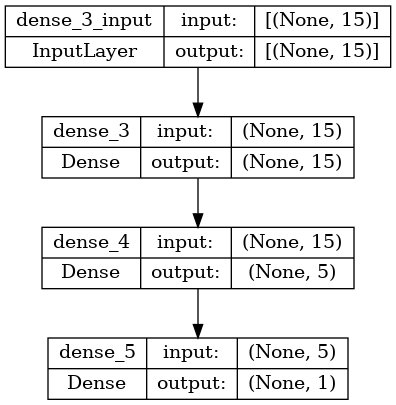

In [37]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [38]:
from ann_visualizer.visualize import ann_viz;
import graphviz
ann_viz(model, filename='SimpleAnn1.gv', title="My first neural network")

In [39]:
history = model.fit(training_sentences, training_labels, batch_size=50, validation_split=0.3,  epochs=250)

Epoch 1/250
262/262 [==============================] - 4s 9ms/step - loss: 0.7219 - accuracy: 0.5349 - val_loss: 0.6962 - val_accuracy: 0.5495
Epoch 2/250
262/262 [==============================] - 2s 6ms/step - loss: 0.6889 - accuracy: 0.5564 - val_loss: 0.6883 - val_accuracy: 0.5573
Epoch 3/250
262/262 [==============================] - 1s 6ms/step - loss: 0.6871 - accuracy: 0.5557 - val_loss: 0.6868 - val_accuracy: 0.5595
Epoch 4/250
262/262 [==============================] - 1s 6ms/step - loss: 0.6855 - accuracy: 0.5577 - val_loss: 0.6852 - val_accuracy: 0.5600
Epoch 5/250
262/262 [==============================] - 2s 6ms/step - loss: 0.6850 - accuracy: 0.5569 - val_loss: 0.6838 - val_accuracy: 0.5600
Epoch 6/250
262/262 [==============================] - 2s 6ms/step - loss: 0.6836 - accuracy: 0.5631 - val_loss: 0.6822 - val_accuracy: 0.5611
Epoch 7/250
262/262 [==============================] - 2s 6ms/step - loss: 0.6833 - accuracy: 0.5608 - val_loss: 0.6825 - val_accuracy: 0.5657

In [40]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

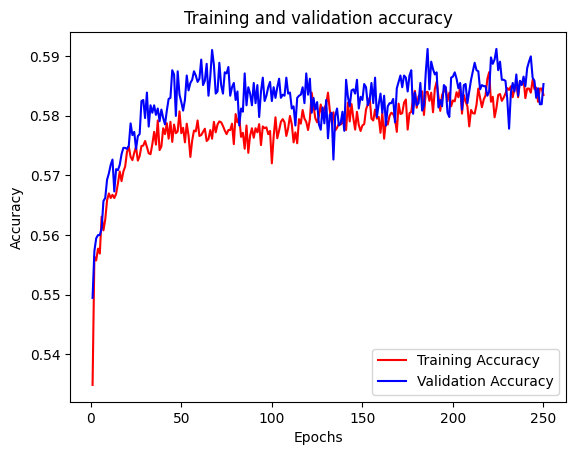

In [41]:
import matplotlib.pyplot as plt
epochs = range(1, 250+1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [42]:
loss, accuracy = model.evaluate(testing_sentences, testing_lables)

251/251 [==============================] - 1s 4ms/step - loss: 0.6770 - accuracy: 0.5808


In [43]:
loss, accuracy

(0.676995038986206, 0.5808061957359314)

# __Neural Network With Embedding Layer__

</br>

__what is Embedding layer__ </br>
Embedding layer is a special layer in neural network which performs the word embedding task. 

</br>

__What is Word Embedding__ </br>
After converting meaningful words into number for processing by computer, the essence of words are totally vanished. For example "Today is very wonderful day". It possess some meaning. Also, words have some relationship between them. Like "very wonderful". Both words have combined meaning. But after replacing these words with some numbers, those numbers connot express the similarity between eachother, cannot represent the meaning. But if we could map the words related to each other in same plane, then the coordinates of the words in that plane would be used to represent the closeness between those words. </br>
Word embedding does the same thing. It calculates the relationship or closeness between two words based on some features and give the numbers to each words, usually a vector having numbers. The words having same meaning or words having close relationship will have less difference between their representative numbers or vector. 
</br>

__What exactly is it?__ </br>
Lets have a close look. </br>
For example we have a sentence: "I love my country Nepal." We are predicting its sentiment to be positive. Now we cannot directly feed the sentence into the computer, because neural network or any machine learning algorithm are based on mathematics. The input data are manupulated using mathematical rules. But it is impossible to perform mathematical operations on letters, characters or words or strings. So we must have to convert them into some numbers or integres before fetching the data into the machine learning algorithms. </br>
While working with tabular dataset, if the data are in categorical form then we can change them into numerical by applying different mechanisms like: one-hot encoding, label encoding etc. But we have different scenario when working with the natural language. For example we have 10000 unique wrds in our corpus, and we want to apply one-hot encoding then our one word will be represented using vector of size 10000. And it will increase the computational complexity. Also, the words will loose their relationship between each other after represented by one-hot encoding method. </br> Another approach could be representing all unique words in the corpus using unique number. But this was also found to be quiet insignificant in terms of possesing information about its closeness with other words and performance. </br> 
Now, here, the concept of embedding comes to play crucial role. It says that, lets measure the closeness of the words based on some common features. For example we have corpus of sentiments towards society which we are classifying into being positive and negative. Then at first we will find the relationship of the unique words in the corpus respect to some features. For example if sentiments are are basically political, then the features would be: </br>
country, leader, leftist, rightist, system, law and order, sports, etc.</br>
Now for example we have a sentiment: "I love my country Nepal"</br> 
Now we want to find the relationship of words in the sentence with respect to the features:</br>

| Features | I | love | my | country | Nepal |
| --- | --- | --- | --- | --- | --- |
| country | 0.8 | 0.8 | 0.6 | 1 | 1 |
| leader | 1 | 0.5 | 1 | 0.5 | 0.8 |
| system | 0.4 | 0.6 | 0.7 | 1 | 1 |
| law and order | 0.5 | 0.4 | 0.6 | 0.9 | 1 |
| Property | 0 | 0 | 0 | 0.1 | 0.2 |
| sentiment | 0.9 | 1 | 0.9 | 0.9 | 1 |

From the above chart we can see that words "Country" and "Nepal" share so many similarity and they are close to each other. The score given to the words with respect to the features can be used as feature vectors to represent the words. The difference between them is small. This is all about word embedding. 
</br>

__Still, how exactly embedding layer works?__
</br>

Take a feature vector, adjust its value using neural network and obtain the word embedding 

__1) Feature Vectors__ </br>
At first, a feature vector for every words in the vocabulary is created. In our case we have 5 unique words in our vocabulary. The number of features are set automatically by the algorithm. But for the ease of understanding we have compared our words against 4 features. So feature vetor is created. 
</br>

__2) Words to numbers__ </br>
Words are converted into numbers by applying one-hot encoding. By this method, each word will be represented by a vector of 0s and 1s having length equal to the vocabulary size. </br>
In our case if we denote our words with the one-hot encoding technique, each word will be represented by a vector of size 5. Actually in our real approach above, for classifying news headlines into sarcastic or non sarcastic  we already have tokenized our words. So these numbers will be one hot encoded.
</br>

__3) Predict next word__ </br>
The main target of embedding layer is to generate the vectors for every words in the vocabulary. For this it will perform the task of predicting next word after certain words. For example it will train its layer to predict "Nepal" after words "I" and "Love". Similarly, other words will be predicted using neighbouring words. For making good prediction the network have to to adjust their weights. The weights of the network which gives the most accurate prediction for particular word will be used as the word vector for that word. This is self-supervised approach. And this approach can be further divided into 1) continuous bag of words and 2)Tf-Idf. The approach we have just mentioned is continuous bag of words. Another approach for word embedding is supervised learning. Where we input our data and train model to predict the target data. During training, the network adjust its weights, which is used as embedding matrix later, and that matrix is used as feature vector.</br>
Lets look at the picture below: 
</br>

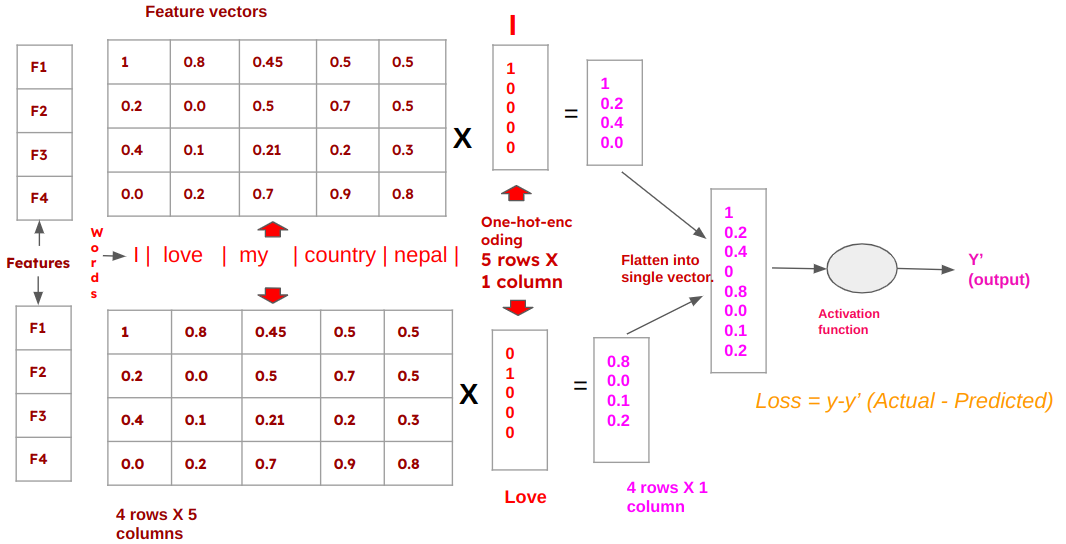

Now lets build a simple neural network with work embedding layer.

In [48]:
vocab_size = 10000
embedding_dim = 16
max_length = 15


In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
#   tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

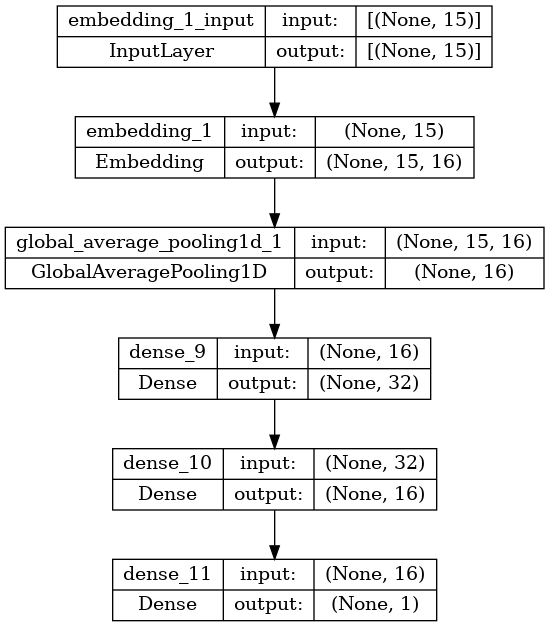

In [50]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)


In [51]:
history = model.fit(training_sentences, training_labels, batch_size=50, validation_split=0.3,  epochs=250)

Epoch 1/250
262/262 [==============================] - 4s 10ms/step - loss: 0.5892 - accuracy: 0.6670 - val_loss: 0.4665 - val_accuracy: 0.7787
Epoch 2/250
262/262 [==============================] - 2s 8ms/step - loss: 0.3475 - accuracy: 0.8479 - val_loss: 0.4416 - val_accuracy: 0.8003
Epoch 3/250
262/262 [==============================] - 2s 8ms/step - loss: 0.2383 - accuracy: 0.9051 - val_loss: 0.5095 - val_accuracy: 0.7891
Epoch 4/250
262/262 [==============================] - 2s 9ms/step - loss: 0.1780 - accuracy: 0.9304 - val_loss: 0.6044 - val_accuracy: 0.7746
Epoch 5/250
262/262 [==============================] - 2s 9ms/step - loss: 0.1334 - accuracy: 0.9506 - val_loss: 0.7346 - val_accuracy: 0.7739
Epoch 6/250
262/262 [==============================] - 2s 9ms/step - loss: 0.1065 - accuracy: 0.9623 - val_loss: 0.8662 - val_accuracy: 0.7707
Epoch 7/250
262/262 [==============================] - 3s 10ms/step - loss: 0.0832 - accuracy: 0.9723 - val_loss: 1.0017 - val_accuracy: 0.76

In [52]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

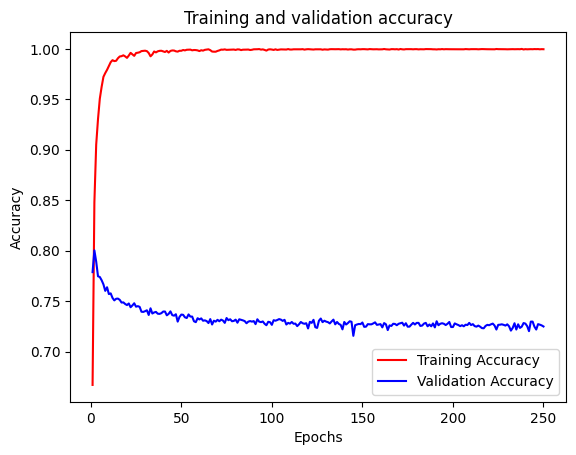

In [53]:
import matplotlib.pyplot as plt
epochs = range(1, 250+1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The model seems to overfit with the training data. It should has low variance and low bias. But it has shown that it has high bias. That means, during trainig model well fitted with the training data set. But the same model could not follow the pattern wich it had learned during the training when tested with the validation dataset. 

# Simple RNN model

In [54]:
training_sentences.shape, training_labels.shape

((18696, 15), (18696,))

In [55]:
from keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(1, input_shape=(15,1), activation='tanh'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

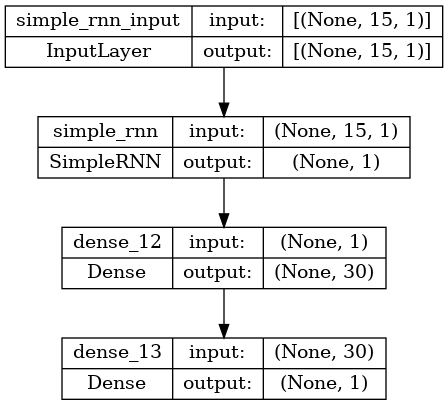

In [56]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)


In [57]:
history = model.fit(training_sentences, training_labels, batch_size=50, validation_split=0.3,  epochs=250)

Epoch 1/250
262/262 [==============================] - 8s 22ms/step - loss: 0.6870 - accuracy: 0.5602 - val_loss: 0.6850 - val_accuracy: 0.5655
Epoch 2/250
262/262 [==============================] - 5s 18ms/step - loss: 0.6860 - accuracy: 0.5602 - val_loss: 0.6845 - val_accuracy: 0.5655
Epoch 3/250
262/262 [==============================] - 5s 18ms/step - loss: 0.6859 - accuracy: 0.5602 - val_loss: 0.6846 - val_accuracy: 0.5655
Epoch 4/250
262/262 [==============================] - 5s 19ms/step - loss: 0.6856 - accuracy: 0.5602 - val_loss: 0.6844 - val_accuracy: 0.5655
Epoch 5/250
262/262 [==============================] - 5s 18ms/step - loss: 0.6856 - accuracy: 0.5602 - val_loss: 0.6840 - val_accuracy: 0.5655
Epoch 6/250
262/262 [==============================] - 5s 17ms/step - loss: 0.6853 - accuracy: 0.5602 - val_loss: 0.6842 - val_accuracy: 0.5655
Epoch 7/250
262/262 [==============================] - 5s 18ms/step - loss: 0.6853 - accuracy: 0.5602 - val_loss: 0.6837 - val_accuracy:

In [61]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

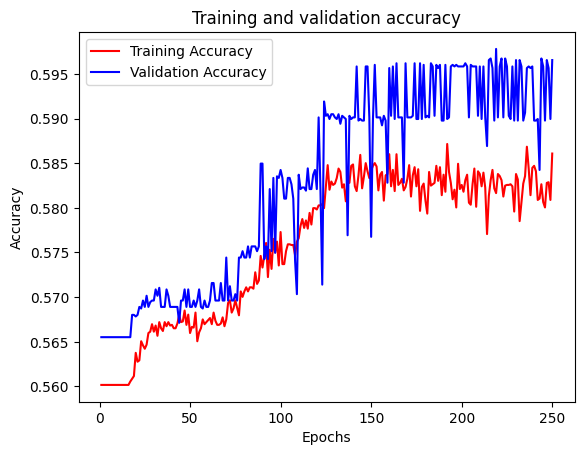

In [59]:
import matplotlib.pyplot as plt
epochs = range(1, 250+1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

From the graph above we can say that, the model performed quiet well if compared with other previous models. Now lets check how it will perform with the test data set.

In [62]:
loss, acc = model.evaluate(testing_sentences, testing_lables)

251/251 [==============================] - 2s 8ms/step - loss: 0.6774 - accuracy: 0.5811


In [64]:
loss, acc

(0.677379846572876, 0.581055760383606)

In [68]:
from sklearn.metrics import confusion_matrix

In [81]:
pred_labels = model.predict(testing_sentences) > 0.5

251/251 [==============================] - 2s 7ms/step


In [99]:
(pred_labels)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

In [84]:
pred_labels.shape, 

(8013, 1)

In [87]:
testing_lables.shape

(8013,)

In [117]:
a = 0
b = 0
for i in testing_lables:
    if i == 0:
        a = a+1
    else:
        b = b+1
print(a,b)

4482 3531


In [115]:
a=0
b = 0
pred_labels

for i in pred_labels:
    if ((i[0])) == False:
        a = a+1
    else:
        b = b+1
print(a,b)

6293 1720


is_sarcastic: 1 if the record is sarcastic otherwise 0

Text(113.9222222222222, 0.5, 'Predicted label')

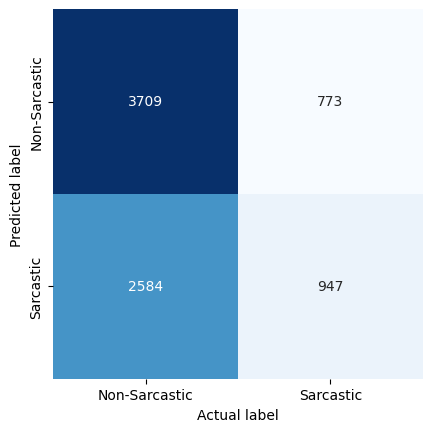

In [142]:
import seaborn as sns

mat = confusion_matrix(testing_lables,pred_labels)

labels = ['Non-Sarcastic', 'Sarcastic']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Actual label')
plt.ylabel('Predicted label')


When considered, 1 as positive and 0 as negative (Sarcastic and Non-Sarcastic)
        
    TP = 947
    TN = 3709
    FP = 773
    FN = 2584
    
    Precision: TP/(TP+FP)
       Recall: TP/(TP+FN)

In [132]:
from sklearn.metrics import precision_score
precision = precision_score(testing_lables,pred_labels)
print('Precision: %.3f' % precision)

Precision: 0.551


In [143]:
from sklearn.metrics import recall_score
recall = recall_score(testing_lables,pred_labels)
print('Recall: %.3f' % recall)

Recall: 0.268
